# <center>VIDEO GAME SALES 🎮</center>

<center><img src="https://i.imgur.com/FgGBSeq.gif"></center>

# Description

This dataset contains a list of video games with sales greater than 100,000 copies till 2016.

**Data description**

   * Name - The games name

   * Platform - Platform of the games release (i.e. PC,PS4, etc.)

   * Year_of_Release - Year of the game's release

   * Genre - Genre of the game

   * NA_sales - Sales in North America (in USD millions)

   * EU_sales - Sales in Europe (in USD millions)

   * JP_sales - Sales in Japan (in USD millions)

   * Other_Sales - Sales in the rest of the world (in USD millions)

   * Critic_Score (maximum of 100) - Critics review score

   * User_Score (maximum of 10) - Users review score

   * Rating (ESRB) - Ratings determined by the Entertainment Software Rating Board

# Objective
In this <b>project</b> I will deal only with <b>data preprocessing, exploratory data analysis and statistical data analysis</b>, where the objective is to understand how the data is distributed and generate insight for future decision-making in order to identify patterns that determine whether a game succeeds or not. This will allow companies to spot potential top games and plan advertising campaigns, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from <b>1980</b> to <b>2016</b>. Below is a sketch of all the stages made in these notebooks, following a logical and intuitive sequence to facilitate the understanding of the data.

# Table of Contents

**Step 1. Open the data file and study the general information**<br>
A. [Used libraries](#bibliotheque)<br>
B. [Explore file information](#information)<br>

**Step 2. Prepare the data**<br>
A. [Replace the column names](#colonnes)<br>
B. [Handle missing values](#valeurs_manquantes)<br>
C. [Convert the data to the required types](#conversion)<br>
D. [Calculate the total sales for each game](#ventes_totales)<br>
E. [Handle invalid data](#invalide)<br>

**Step 3. Analyze the data (EDA)**<br>
A. [Games per Year](#graphique1)<br>
B. [Top Platforms](#graphique2)<br>
C. [Prognosis for 2017](#2017)<br>

# Step 1. Open the data file and study the general information

## A. Used libraries

<a id="bibliotheque"></a>

In [819]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
import plotly.express as px

## B. Explore file information

<a id="information"></a>

In [820]:
try:
    df = pd.read_csv('/datasets/games.csv')
    df.info()
except FileNotFoundError:
    sys.exit('Error: CSV file was not found')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [821]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Step 2. Prepare the data

## A. Replace the column names

<a id="colonnes"></a>

In [822]:
# make them lowercase
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## B. Handle missing values

<a id="valeurs_manquantes"></a>

In [823]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [824]:
df.dropna(subset=['name', 'year_of_release'], inplace=True)
df.fillna(value='tbd', inplace=True) # critic_score is converted automatically to 'object'
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Conclusion

I removed a total of 271 records in the `year_of_release` and `name` columns because these values are invalid/NaN and a small portion of our data.<br>
As for `critic_score`, `user_score` and `rating` we can see that they are approx 50% of our data. Therefore instead of removing them which would be disastrous
I entered `tbd` in their missing values because they share a common property of <i>score</i>. `critic_score` is <b>converted automatically</b> to `object` after using `fillna()` method.

`tbd` means "To Be Determined". The reason `tbd` is in missing values is because there may have not been a review when the data was gathered so it's better to leave it as `tbd` which is a valid value.

## C. Convert the data to the required types

<a id="conversion"></a>

In [825]:
# Convert year_of_release -> int to fit its proper data type
df['year_of_release'] = df['year_of_release'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.5+ MB


## D. Calculate the total sales for each game

<a id="ventes_totales"></a>

In [826]:
# Calculate the sum of sales in all regions
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,tbd,tbd,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,tbd,tbd,tbd,31.38


## E. Handle invalid data

<a id="invalide"></a>

Noticed that DS(Nintendo DS) was released on 2004(<a href="https://en.wikipedia.org/wiki/Nintendo_DS">source</a>) and there is 1 game from 1985 where its platform is DS

In [827]:
filt = (df['platform'] == 'DS') & (df['year_of_release'] < 2004)
df[filt]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,tbd,tbd,tbd,0.02


In [828]:
# Delete this row based on a conditional expression
df.drop(df[filt].index, inplace=True)

# Step 3. Analyze the data (EDA)

## A. Games per Year

<a id="graphique1"></a>

In [829]:
games_per_year = df.groupby('year_of_release')['name'].count()
games_per_year.head()

year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
Name: name, dtype: int64

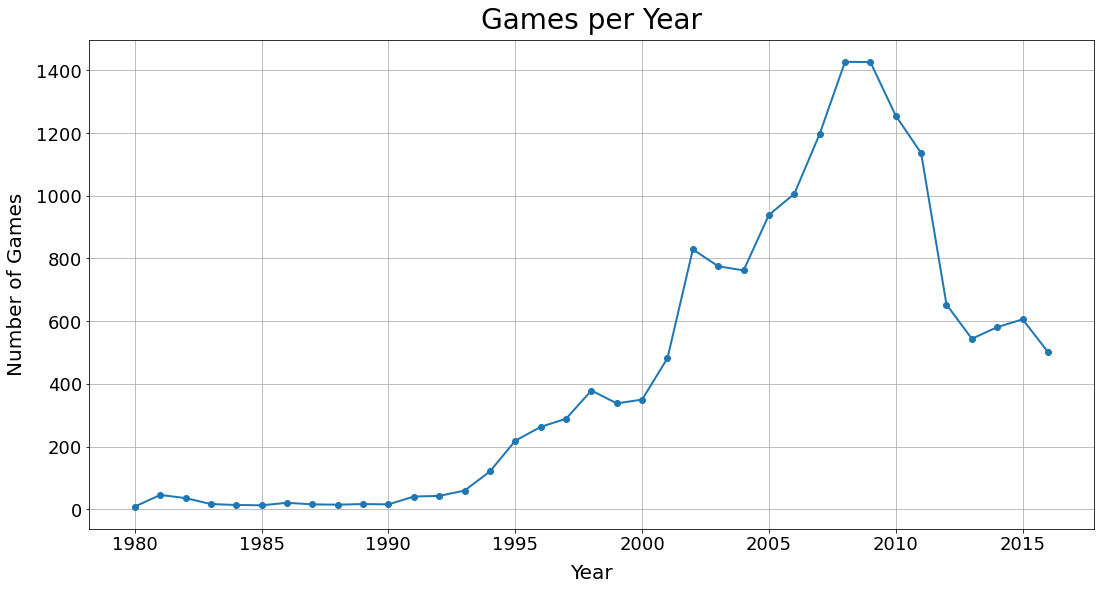

In [830]:
games_per_year.plot(style='o-', figsize=(18, 9), linewidth=2, grid=True) # 'o-': connected scatter plot
plt.title("Games per Year", fontsize=28, y=1.01)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlabel("Year", fontsize=20, labelpad=10)
plt.ylabel("Number of Games", fontsize=20, labelpad=10)
plt.show()

### Conclusion

We can see that the number of games has been continually increasing. There was a peak in 2008-2009 and a significant slope right after which was at the time of of the <a href="https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008">recession</a>, which affected the video game industry as well as other industries.

## B. Top Platforms

<a id="graphique2"></a>

In [831]:
# Top 5 platforms with the greatest total sales
top_5 = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
top_5

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: total_sales, dtype: float64

In [832]:
platform_names = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
fig = px.pie(top_5, values='total_sales', names=platform_names, title='Top Platforms by Total Sales')
fig.show()

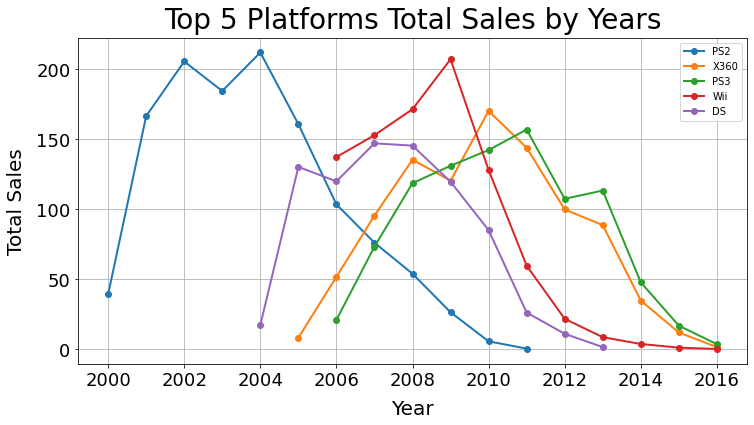

In [833]:
top_platforms = df.query('platform in @platform_names')
platform_group = top_platforms.groupby(['platform', 'year_of_release']).sum()
platform_group.reset_index(inplace=True)

ps2_group = platform_group[platform_group['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum()
x360_group = platform_group[platform_group['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum()
ps3_group = platform_group[platform_group['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum()
wii_group = platform_group[platform_group['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum()
ds_group = platform_group[platform_group['platform'] == 'DS'].groupby('year_of_release')['total_sales'].sum()

#plt.plot(ps2_group, x360_group, ps3_group, wii_group, ds_group, style='-o', color=('steelblue', "seagreen", "firebrick", "darkorange", "red"), figsize=(16, 14), linewidth=2)
ps2_group.plot(style='-o', figsize=(12, 6), linewidth=2)
x360_group.plot(style='-o', figsize=(12, 6), linewidth=2)
ps3_group.plot(style='-o', figsize=(12, 6), linewidth=2)
wii_group.plot(style='-o', figsize=(12, 6), linewidth=2)
ds_group.plot(style='-o', figsize=(12, 6), linewidth=2)

plt.title("Top 5 Platforms Total Sales by Years", fontsize=28, y=1.01)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlabel("Year", fontsize=20, labelpad=10)
plt.ylabel("Total Sales", fontsize=20, labelpad=10)
plt.grid()
plt.legend(labels=['PS2', 'X360', 'PS3', 'Wii', 'DS'])
plt.show()

### Conclusion

We can see that all of the top platforms were very popular when they came out with continous rise in sales but after 3-5 years their total sales began dropping till they reached 0 sales. We can infer from that the the life-span of a popular platform is 4~ years and then it's a good time to think about the next platform to produce. 

Also, we can see that it generally take 0-2 for a new platform to appear and become popular and fading takes longer(probably because of fan-base communities that were made over time)

## C. Prognosis for 2017

<a id="2017"></a>

In [835]:
# Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

'\nDetermine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.\n'